# Connecting to a database in R

In [1]:
library(RPostgreSQL)

tryCatch({
    drv <- dbDriver("PostgreSQL")
    conn <- dbConnect(drv, 
                 dbname = "postgres",
                 host = Sys.getenv("DATABASE_HOSTNAME"), 
                 port = Sys.getenv("DATABASE_PORT"),
                 user = Sys.getenv("DATABASE_USER"), 
                 password = Sys.getenv("DATABASE_PASSWORD"))
    print("Connected!")
    },
    error=function(cond) {
            print("Unable to connect to database.")
    })

Loading required package: DBI



[1] "Connected!"


In [12]:
sections <- dbGetQuery(conn, "SELECT assigned_section, count(*) FROM cts_forms_report GROUP BY assigned_section")
sections
summary(sections)

,assigned_section,count
,<chr>,<dbl>
1,ADM,417
2,EOS,434
3,IER,413
4,SPL,449
5,HCE,436
6,POL,429
7,APP,435
8,FCS,420
9,DRS,432


 assigned_section       count      
 Length:12          Min.   :404.0  
 Class :character   1st Qu.:417.8  
 Mode  :character   Median :430.5  
                    Mean   :426.7  
                    3rd Qu.:434.2  
                    Max.   :449.0  

In [17]:
section_names <- sections[,1]
section_counts <- sections[,2]

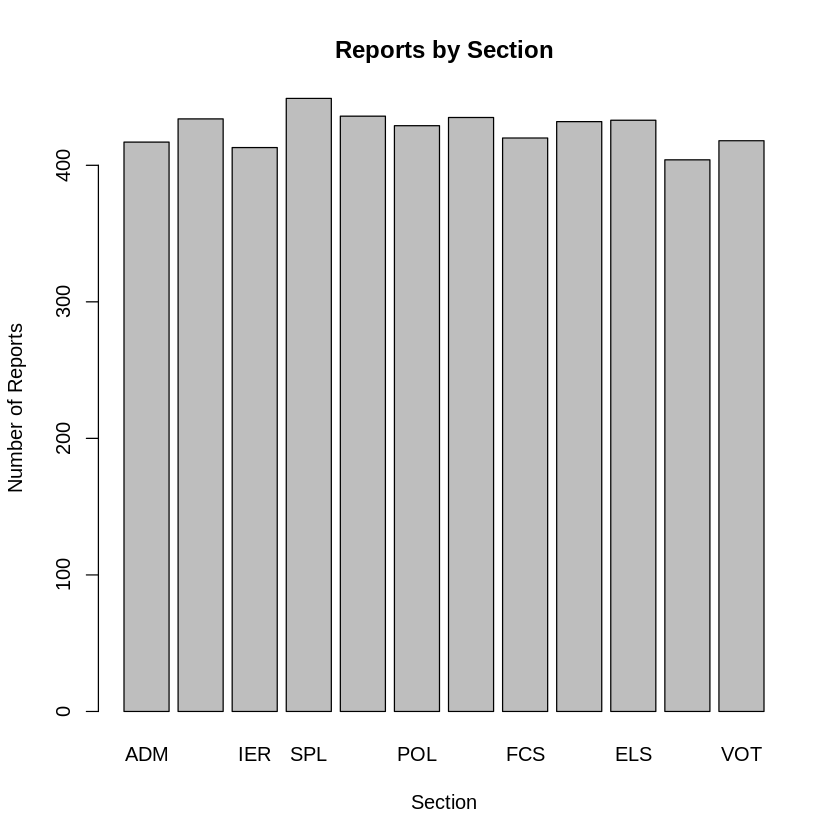

In [21]:
barplot(section_counts,xlab='Section',ylab='Number of Reports',main='Reports by Section', names.arg=section_names)
